|  [National Science Data Fabric](https://nationalsciencedatafabric.org/) + [NASA Open Climate Workbench (OCW)](https://esto.nasa.gov/forums/estf2024/estf24Abstracts/lee.html) +  [WIRED Global Center](https://resilience.utah.edu/) <br> created by [Valerio Pascucci](http://cedmav.org/) & [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)   |![nsdf](images/NSDF-smaller.png)  |![NASA](images/NASA.png)| ![wired](images/wired-logo-small.png) |
|:---|:---:|:---:|---:|

## Uncomment the line below if any library is missing

In [1]:
#!pip install --upgrade openvisuspy xarray openvisuspy  matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys

try:
  import OpenVisus as ov
except:
  sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
  import OpenVisus as ov

os.environ["VISUS_CACHE"]=os.environ.get("VISUS_CACHE","./.visus_cache")
print("VISUS_CACHE is ",os.environ["VISUS_CACHE"])
os.makedirs(os.environ["VISUS_CACHE"],exist_ok=True)

output_dir = ".output"
os.makedirs(output_dir,exist_ok=True)

VISUS_CACHE is  ./.visus_cache


# Compare Resolutions

tas_day_ACCESS-CM2_ssp585_r1i1p1f1_gn


  0%|          | 0/6 [00:00<?, ?it/s]

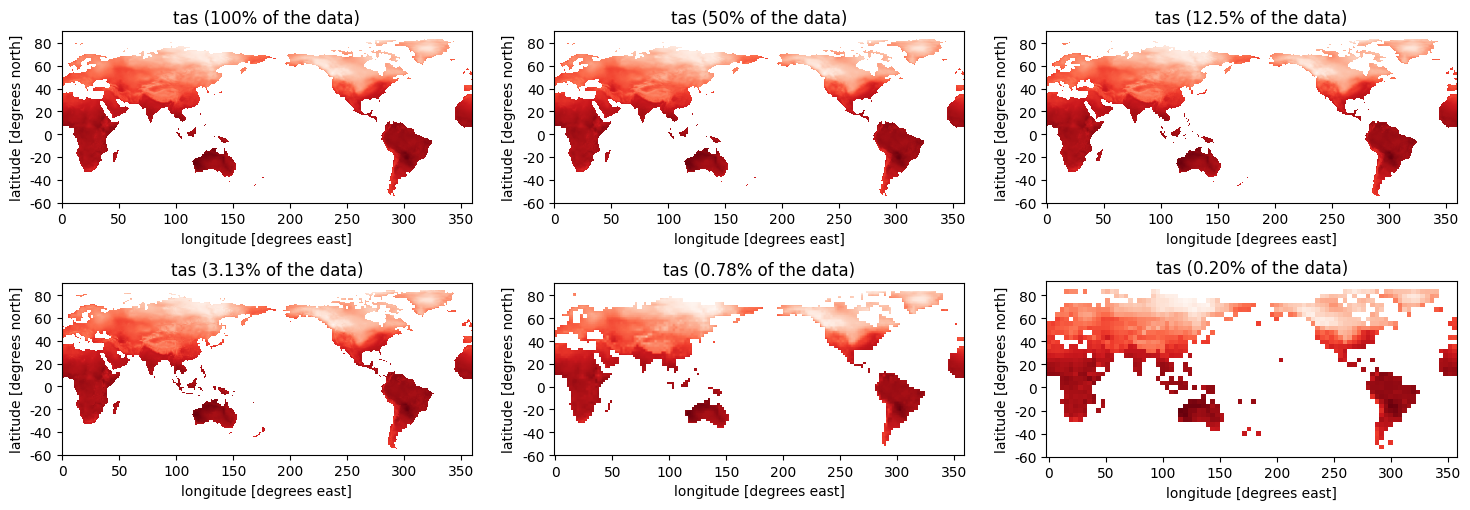

In [4]:
from tqdm.notebook import tqdm
import cartopy.crs as ccrs

variables = {
    "hurs":    "Near-Surface Relative Humidity",
    "huss":    "Near-Surface Specific Humidity",
    "pr":      "Precipitation",
    "rlds" :   "Surface Downwelling Longwave Radiation",
    "rsds":    "Surface Downwelling Shortwave Radiation",
    "sfcWind": "Daily-Mean Near-Surface Wind Speed",
    "tas":     "Daily Near-Surface Air Temperature",
    "tasmax":  "Daily Maximum Near-Surface Air Temperature",
    "tasmin":  "Daily Minimum Near-Surface Air Temperature"
}
model = "ACCESS-CM2"
year=2015 # This is the year whne the data switches from historical to simulated
scenario = "historical" if year < 2015 else "ssp585"
my_cmap = 'Reds'
variable = "tas"

# Open (connect to) dataset
dataset_name = f"{variable}_day_{model}_{scenario}_r1i1p1f1_gn"
print(dataset_name)
db = ov.LoadDataset(f"http://atlantis.sci.utah.edu/mod_visus?dataset={dataset_name}&cached=arco")
data=db.read()
y_max,x_max = data.shape 

xlabels = [str(x) for x in range(  0,360,50)] 
ylabels = [str(x) for x in range(-60, 90,20)] 

datasets = []
f, axarr = plt.subplots(2,3,figsize=(18, 6))
ii = 0
axa_list = [axarr[0,0],axarr[0,1],axarr[0,2],axarr[1,0],axarr[1,1],axarr[1,2]]
qual_str = ["100%","50%","12.5%","3.13%","0.78%","0.20%","0.05%"]

#for quality in tqdm([0,-2,-4,-6,-8,-10]): # use negative even numbers for resolution 
for quality in tqdm([0,0,-2,-4,-6,-8]): # use negative even numbers for resolution 
    my_fig, my_plt = f, axa_list[ii] 
    data=db.read(time=year*365+364,quality=quality)
    datasets.append(np.copy(data))
    y,x = data.shape 
    xticks = [i*x/x_max for i in range(0,x_max, 200)] 
    yticks = [i*y/y_max  for i in range(y_max,0,-80)] 

    plot = my_plt.imshow(np.flip(data, 0), cmap=my_cmap)
    #plot.axes(projection=ccrs.PlateCarree())
    my_plt.set_xticks(xticks, labels=xlabels)
    my_plt.set_yticks(yticks, labels=ylabels)
    my_plt.set(xlabel='longitude [degrees east]', ylabel='latitude [degrees north]',title=f"{variable} ("+qual_str[ii]+ " of the data)")
    ii = ii+1
    
plt.savefig(os.path.join(output_dir,"cmip6_IDX_07_read_data_multiresoluton-display.png"))
plt.show()